In [1]:
import pandas as pd 
import numpy as np
import matplotlab.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlab'

In [2]:
items = pd.read_csv(r"C:\Users\user\Desktop\kaggle data new\items.csv")
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [3]:
items_categories=pd.read_csv(r"C:\Users\user\Desktop\kaggle data new\item_categories.csv")
items_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [4]:
train =pd.read_csv(r"C:\Users\user\Desktop\kaggle data new\sales_train.csv")
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
shops =pd.read_csv(r"C:\Users\user\Desktop\kaggle data new\shops.csv")
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [6]:
test =pd.read_csv(r"C:\Users\user\Desktop\kaggle data new\test.csv")
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [8]:
train.shape

(2935849, 6)

In [9]:
train['date'] = pd.to_datetime(train['date'])

In [10]:
train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [11]:
train['date'] = train['date'].apply(lambda x: x.strftime("%Y-%m"))

In [12]:
train.head().sort_values(by = 'date')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
4,2013-01,0,25,2555,1099.00,1.0
0,2013-02,0,59,22154,999.00,1.0
1,2013-03,0,25,2552,899.00,1.0
2,2013-05,0,25,2552,899.00,-1.0
3,2013-06,0,25,2554,1709.05,1.0


In [13]:
train.drop(['date_block_num','item_price'] , axis =1, inplace= True)

In [14]:
train.head().sort_values(by = 'date')

,date,shop_id,item_id,item_cnt_day
4,2013-01,25,2555,1.0
0,2013-02,59,22154,1.0
1,2013-03,25,2552,1.0
2,2013-05,25,2552,-1.0
3,2013-06,25,2554,1.0


In [15]:
df = train.groupby(['date','shop_id','item_id']).sum()
df

item_cnt_day
date    shop_id item_id              
2013-01 0       32                4.0
                33                2.0
                35                2.0
                43                1.0
                51                2.0
...                               ...
2015-12 59      21421             1.0
                21669             1.0
                21872             1.0
                21968            -1.0
                22088             2.0

[1799395 rows x 1 columns]

In [16]:
df = train.pivot_table(index=['shop_id','item_id'], columns='date', values='item_cnt_day', fill_value=0)
df.reset_index(inplace=True)
df.head()

date,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,0,30,0.000000,3.444444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,31,0.000000,1.571429,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,32,1.333333,1.500000,2.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,33,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,1.000000,1.200000,0.0,1.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
test_df = pd.merge(test, df, on=['shop_id','item_id'], how='left')
# test_df.drop(['ID', '2013-01'], axis=1, inplace=True)
test_df = test_df.fillna(0)

In [18]:
test_df.head()

,ID,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.5,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
train_df= df

In [20]:
Y = df['2015-10'].values
X = df.drop(['2015-10'], axis = 1)
test_full = test_df

from sklearn.model_selection import train_test_split

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, Y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = test_df[my_cols].copy()

In [21]:
X_train

date,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-11,2015-12
351841,51,18352,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205713,29,17707,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111499,18,20653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54580,10,2466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381959,54,20167,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,52,16917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
358083,52,12828,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
152315,25,1944,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117952,19,14352,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
input_shape = X_train.shape

# ReLU - Model

In [25]:
!pip install tensorflow

  Using cached tensorflow-2.5.0-cp38-cp38-win_amd64.whl (422.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached grpcio-1.34.1-cp38-cp38-win_amd64.whl (2.9 MB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.5-py2.py3-none-any.whl (18 kB)
  Attempting

In [26]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

keras.backend.clear_session()


model = keras.models.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

model.compile(loss='mean_absolute_error',
            optimizer=keras.optimizers.Adam(0.001))

Epoch 1/500
5302/5302 [==============================] - 20s 4ms/step - loss: 14.2178 - val_loss: 9.1014
Epoch 2/500
5302/5302 [==============================] - 20s 4ms/step - loss: 5.6672 - val_loss: 2.8973
Epoch 3/500
5302/5302 [==============================] - 20s 4ms/step - loss: 2.5543 - val_loss: 1.4062
Epoch 4/500
5302/5302 [==============================] - 19s 4ms/step - loss: 1.0194 - val_loss: 0.4919
Epoch 5/500
5302/5302 [==============================] - 20s 4ms/step - loss: 0.2438 - val_loss: 0.0953
Epoch 6/500
5302/5302 [==============================] - 20s 4ms/step - loss: 0.0897 - val_loss: 0.0950
Epoch 7/500
5302/5302 [==============================] - 19s 4ms/step - loss: 0.0894 - val_loss: 0.0956
Epoch 8/500
5302/5302 [==============================] - 20s 4ms/step - loss: 0.0895 - val_loss: 0.0955
Minimum Validation Loss: 0.0950


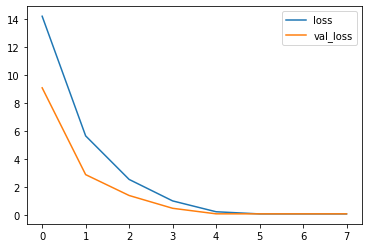

In [27]:
keras.backend.clear_session()

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=3, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [30]:
prediction = model.predict(X_test)


In [32]:
prediction

array([[0.00879491],
       [0.00232877],
       [0.02473297],
       ...,
       [0.00500177],
       [0.00451933],
       [0.00034833]], dtype=float32)

In [33]:
sample_sub =pd.read_csv(r'C:\Users\user\Desktop\kaggle data new\sample_submission.csv')
sample_sub.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [34]:
sample_sub['item_cnt_month'] = prediction
sample_sub.to_csv('prediction.csv', index=False)
sample_sub.head()

,ID,item_cnt_month
0,0,0.008795
1,1,0.002329
2,2,0.024733
3,3,-0.000451
4,4,0.002323


# LSTM - Model

In [35]:
x_train = X_train.to_numpy()
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_valid = X_valid.to_numpy()
x_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1))
x_test = X_test.to_numpy()
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

keras.backend.clear_session()


model = keras.models.Sequential([
    layers.LSTM(150, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    layers.LSTM(50, return_sequences=True),
    layers.LSTM(20, return_sequences=False),
    layers.Dense(1)
  ])

model.compile(loss='mean_absolute_error',
            optimizer=keras.optimizers.Adam(0.001))

In [37]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy']) # we want to minimize loss

Epoch 1/5
332/332 [==============================] - 603s 2s/step - loss: 0.2782 - accuracy: 0.9228 - val_loss: 3.1387 - val_accuracy: 0.9233
Epoch 2/5
332/332 [==============================] - 615s 2s/step - loss: 0.2710 - accuracy: 0.9230 - val_loss: 3.1352 - val_accuracy: 0.9227
Epoch 3/5
332/332 [==============================] - 570s 2s/step - loss: 0.2637 - accuracy: 0.9232 - val_loss: 3.1326 - val_accuracy: 0.9229
Epoch 4/5
332/332 [==============================] - 797s 2s/step - loss: 0.2611 - accuracy: 0.9229 - val_loss: 3.1367 - val_accuracy: 0.9226
Epoch 5/5
332/332 [==============================] - 420s 1s/step - loss: 0.2548 - accuracy: 0.9234 - val_loss: 3.1315 - val_accuracy: 0.9224
Minimum Validation Loss: 3.1315


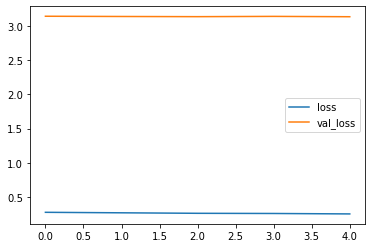

In [38]:
keras.backend.clear_session()

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=3, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=1024,
    epochs=5,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [39]:
x_test = X_test.to_numpy()
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [40]:
prediction = model.predict(x_test)

In [41]:
sample_sub =pd.read_csv(r'C:\Users\user\Desktop\kaggle data new\sample_submission.csv')

print(sample_sub.shape)
sample_sub.head()

(214200, 2)


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [42]:
sample_sub['item_cnt_month'] = prediction
sample_sub.to_csv('prediction.csv', index=False)
sample_sub.head()

,ID,item_cnt_month
0,0,0.375990
1,1,0.042932
2,2,0.386757
3,3,0.119183
4,4,0.042932
